In [3]:
%reload_ext lab_black
import pandas as pd
import numpy as np
from plotnine import *

In [4]:
# read data
od_pop = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/ssloate/20_intermediate_files/death_data_with_pop.csv?token=ARFW6V54MDQRD4OADIEZ2HS7TALDQ"
)

In [6]:
od_pop = od_pop.drop(columns="Unnamed: 0")

In [50]:
# create TX, FL, and WA datasets

states_needed = ["FL", "TX", "WA"]
policy_years = [2010, 2007, 2012]

# Florida: pre and post 2010

FL_policy_year = 2010
FL = od_pop[od_pop["State Abbr"] == "FL"]
FL_pre = FL[FL["Year"] < FL_policy_year]
FL_post = FL[FL["Year"] >= FL_policy_year]

# Texas: pre and post 2007
TX_policy_year = 2007
TX = od_pop[od_pop["State Abbr"] == "TX"]
TX_pre = TX[TX["Year"] < TX_policy_year]
TX_post = TX[TX["Year"] >= TX_policy_year]

# WA: pre and post 2012
WA_policy_year = 2012
WA = od_pop[od_pop["State Abbr"] == "WA"]
WA_pre = WA[WA["Year"] < WA_policy_year]
WA_post = WA[WA["Year"] >= WA_policy_year]

# create a list of the states
titles = od_pop["State"].unique()
titles = titles.tolist()

In [8]:


# create a list of the states
states = od_pop["State Abbr"].unique()
states = states.tolist()

# define columns with pre variables
pre_columns_opioid_states = ["FL_pre", "TX_pre", "WA_pre"]
post_columns_opioid_states = ["FL_post", "TX_post", "WA_post"]


# create columns with all 0s
for i in range(0, 3):
    od_pop[pre_columns_opioid_states[i]] = 0
    od_pop[post_columns_opioid_states[i]] = 0

# fill in 1s in pre and post columns based on states and years
for i in range(0, 3):
    od_pop.loc[
        (
            (od_pop["State Abbr"] == states_needed[i])
            & (od_pop["Year"] < policy_years[i])
        ),
        pre_columns_opioid_states[i],
    ] = "1"
    od_pop.loc[
        (
            (od_pop["State Abbr"] == states_needed[i])
            & (od_pop["Year"] >= policy_years[i])
        ),
        post_columns_opioid_states[i],
    ] = "1"

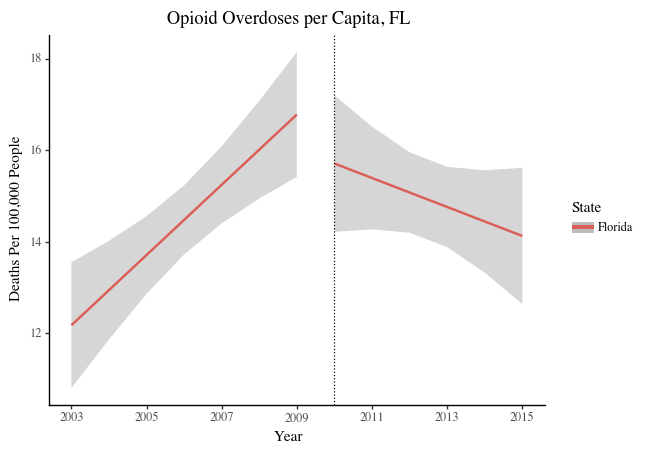

<ggplot: (8771490838813)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_pre_post


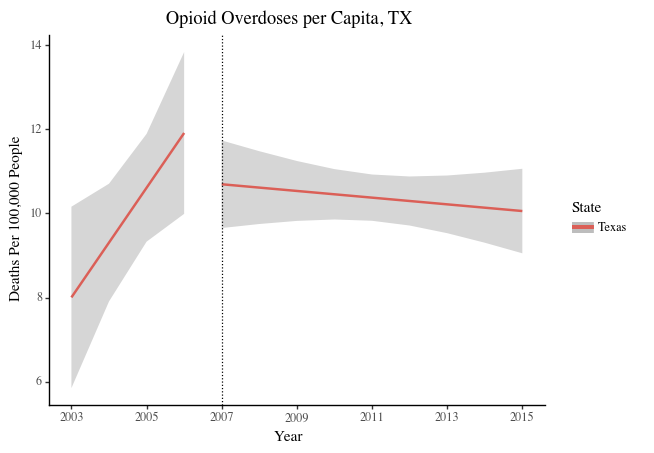

<ggplot: (8771497381477)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_pre_post


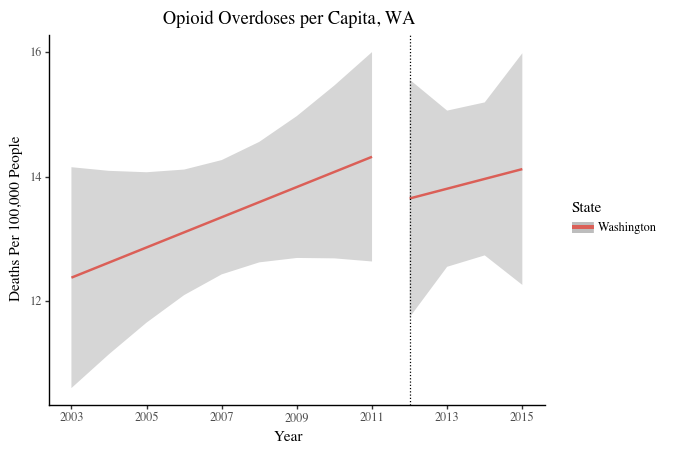

<ggplot: (8771498034869)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: WA_pre_post


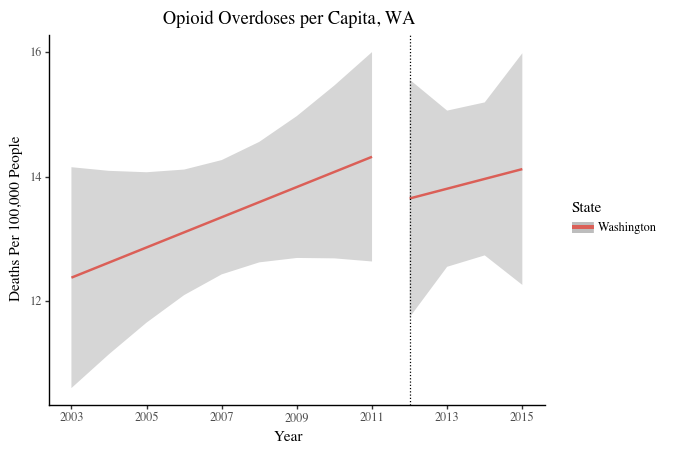

<ggplot: (8771498034869)>


In [9]:
# graph pre-post: loop over states

for i in range(len(policy_years)):
    p = (
        ggplot()
        + geom_smooth(
            od_pop[od_pop[pre_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop[od_pop[post_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policy_years[i], linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita, " + states_needed[i])
    )
    print(p)
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_pre_post",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,
    )


print(p)

In [53]:
# generate pre and post datasets in 2010, for Florida DiD
states = od_pop["State Abbr"].unique()
FL_df_pre = []
FL_df_post = []

# creates list of dataframes with pre 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < FL_policy_year]
    # x will be a state for  years less than 2010
    FL_df_pre.append(x)


# creates list of dataframes with post 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= FL_policy_year]
    # x will be a state for 2010 or higher years
    FL_df_post.append(x)

# run checks
assert len(FL_df_pre) == len(FL_df_post)
assert len(FL_df_pre) == 50

In [54]:
# generate pre and post datasets in 2007, for Texas DiD
states = od_pop["State Abbr"].unique()
TX_df_pre = []
TX_df_post = []

# creates list of dataframes with pre 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < TX_policy_year]
    # x will be a state for  years less than 2007
    TX_df_pre.append(x)


# creates list of dataframes with post 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= TX_policy_year]
    # x will be a state for 2007 or higher years
    TX_df_post.append(x)

# run checks
assert len(TX_df_pre) == len(TX_df_post)
assert len(TX_df_pre) == 50

In [55]:
# generate pre and post datasets in 2012, for WA DiD
states = od_pop["State Abbr"].unique()
WA_df_pre = []
WA_df_post = []

# creates list of dataframes with pre 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < WA_policy_year]
    # x will be a state for  years less than 2012
    WA_df_pre.append(x)


# creates list of dataframes with post 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= WA_policy_year]
    # x will be a state for 2012 or higher years
    WA_df_post.append(x)

# run checks
assert len(WA_df_pre) == len(WA_df_post)
assert len(WA_df_pre) == 50

In [56]:
# run a loop to generate DiD comparisons to Florida
pltList = []

for number in range(len(states)):
    p = (
        ggplot()
        + geom_smooth(
            FL_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Florida, Overdose Deaths per Capita")
    )
    pltList.append(p)

    name = "Overdose Comparison: FL " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose_Comparison",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose Comparison: FL Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/Overdose Comparison: FL Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

In [57]:
# run a loop to generate DiD comparisons to TX
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            TX_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Texas, Overdose Deaths per Capita")
    )

    name = "Overdose Comparison: TX " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Overdose Comparison: TX Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/Overdose Comparison: TX Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

In [58]:
# run a loop to generate DiD comparisons to WA
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            WA_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=WA_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Washington, Overdose Deaths per Capita")
    )
    name = "Overdose Comparison: WA " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Overdose Comparison: WA Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID/Overdose Comparison: WA Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarnin

Our chosen states for deaths comparison are:

Washington: Colorado, Connecticut, Kansas, Massachusetts, New Jersey, Oregon

Texas: WV, VA, NV, LA, ID, CO

FL: TN, NC, NH, IA, IL, GA

In [104]:
# get total deaths in each state per year, for comparison

grouped = od_pop.groupby(by=["Year", "State", "State Abbr"]).mean()
od_agg = grouped.reset_index()
od_agg.head()

,Year,State,State Abbr,FIPS,Deaths,Population,"Deaths Per 100,000 People"
0,2003,Alabama,AL,1057.666667,35.000000,4.023680e+05,7.875225
1,2003,Arizona,AZ,4014.428571,91.428571,7.172177e+05,10.250402
2,2003,Arkansas,AR,5119.000000,18.000000,3.652580e+05,4.928023
3,2003,California,CA,6060.212121,98.212121,1.029541e+06,10.969396
4,2003,Colorado,CO,8049.222222,40.111111,3.800236e+05,9.580533


In [105]:
# For FL comparison: generate average TN, NC, NH, IA, IL, GA data

FL_comp = ["TN", "NC", "NH", "IA", "IL", "GA"]
od_FL_comp = []
for i in range(len(FL_comp)):
    x = od_agg[od_agg["State Abbr"] == FL_comp[i]]
    od_FL_comp.append(x)
# concat list to dataframe
od_FL_comp = pd.concat(od_FL_comp)

# For TX comparison: generate average "WV", "VA", "NV", "LA", "ID", "CO" data

TX_comp = ["WV", "VA", "NV", "LA", "ID", "CO"]
od_TX_comp = []
for i in range(len(TX_comp)):
    x = od_agg[od_agg["State Abbr"] == TX_comp[i]]
    od_TX_comp.append(x)
od_TX_comp = pd.concat(od_TX_comp)


# For WA comparison: generate average "CO", "CT", "KS", "MA", "NJ", "OR" data

WA_comp = ["CO", "CT", "KS", "MA", "NJ", "OR"]
od_WA_comp = []
for i in range(len(WA_comp)):
    x = od_agg[od_agg["State Abbr"] == WA_comp[i]]
    od_WA_comp.append(x)
od_WA_comp = pd.concat(od_WA_comp)

In [106]:
od_FL_comp

,Year,State,State Abbr,FIPS,Deaths,Population,"Deaths Per 100,000 People"
38,2003,Tennessee,TN,47096.111111,30.555556,312292.222222,11.164661
83,2004,Tennessee,TN,47119.153846,27.384615,245503.846154,12.706512
129,2005,Tennessee,TN,47114.733333,30.200000,231884.866667,14.391042
175,2006,Tennessee,TN,47095.000000,31.875000,211618.937500,19.491927
222,2007,Tennessee,TN,47102.523810,28.095238,182640.238095,19.387720
...,...,...,...,...,...,...,...
382,2011,Georgia,GA,13130.333333,22.166667,219610.500000,13.206718
429,2012,Georgia,GA,13132.312500,21.500000,215949.218750,12.745558
477,2013,Georgia,GA,13142.538462,24.653846,245947.230769,12.817932
526,2014,Georgia,GA,13143.933333,27.066667,226580.166667,14.852542


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: FL_DiD_aggregates_averages


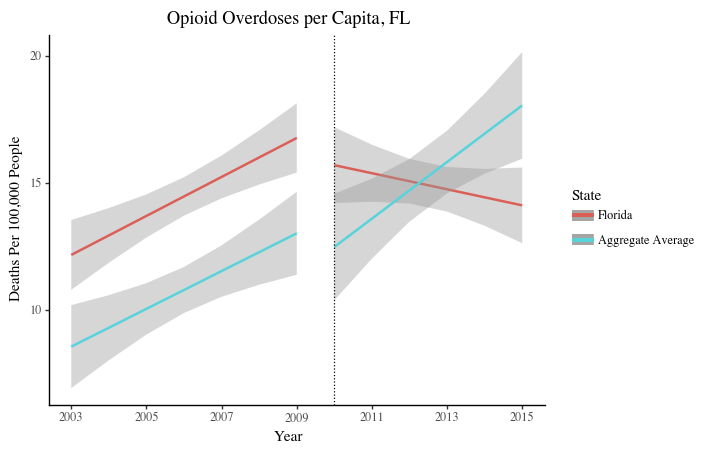

<ggplot: (8771496841045)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: TX_DiD_aggregates_averages


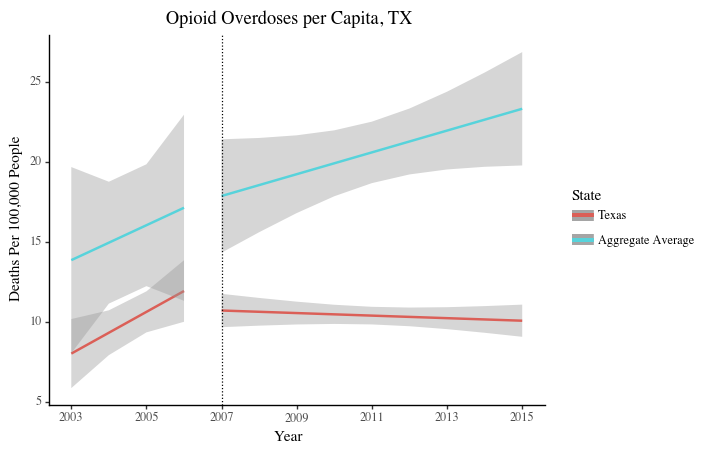

<ggplot: (8771500635161)>


/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/Deaths: WA_DiD_aggregates_averages


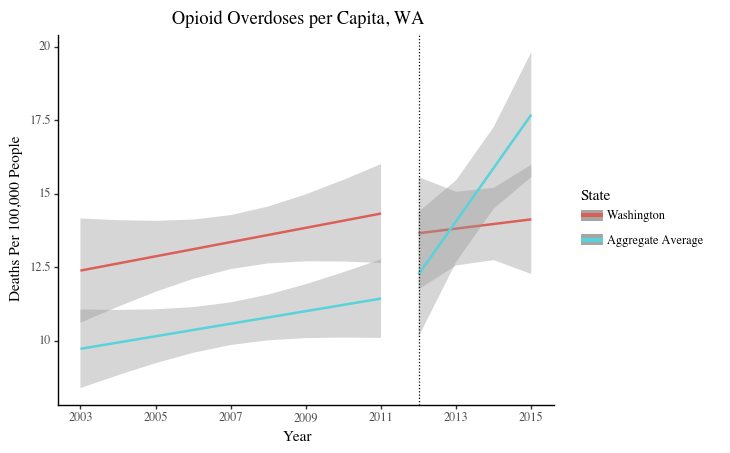

<ggplot: (8771498341241)>


In [121]:
# graph pre-post: loop over states
states_data = [od_FL_comp, od_TX_comp, od_WA_comp]

for i in range(len(policy_years)):

    # first, get avg of comparison data
    x = states_data[i].groupby(by="Year").mean()
    x = x.reset_index()
    # get data for below policy year and add state column "Aggregate"
    x_pre = x[x["Year"] < policy_years[i]]
    x_pre = x_pre.copy()
    x_pre["State"] = "Aggregate Average"

    # get data for policy year or above
    x_post = x[x["Year"] >= policy_years[i]]
    x_post = x_post.copy()
    x_post["State"] = "Aggregate Average"

    p = (
        ggplot()
        + geom_smooth(
            od_pop[od_pop[pre_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            od_pop[od_pop[post_columns_opioid_states[i]] == "1"],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            x_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            x_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policy_years[i], linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title="Opioid Overdoses per Capita, " + states_needed[i])
    )
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_DiD_aggregates_averages",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,
    )

    print(p)

In [108]:
x_pre

,Year,FIPS,Deaths,Population,"Deaths Per 100,000 People",State
0,2003,22876.996825,45.790476,468490.155556,9.322372,Aggregate
1,2004,22879.223016,42.650198,457016.093452,9.371107,Aggregate
2,2005,22880.233069,50.245238,459380.210450,10.330884,Aggregate
3,2006,22878.253439,55.729894,456743.066138,11.994859,Aggregate
4,2007,22880.890230,51.930405,445858.283456,11.099582,Aggregate
5,2008,22881.736472,47.074675,441660.284118,10.160868,Aggregate
6,2009,22881.758658,46.135823,442471.373918,10.303295,Aggregate
7,2010,22882.175986,45.130501,438087.926076,10.304819,Aggregate
8,2011,22882.223377,52.734740,432688.934632,12.298414,Aggregate


In [109]:
    print(p)
    ggsave(
        plot=p,
        filename="Deaths: " + states_needed[i] + "_pre_post",
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
        dpi=100,

SyntaxError: unexpected EOF while parsing (<ipython-input-109-a680de46cb84>, line 6)

Error in callback <bound method BlackFormatter.format_cell of <lab_black.BlackFormatter object at 0x7fa45ac9cf90>> (for post_run_cell):


TokenError: ('EOF in multi-line statement', (7, 0))

In [18]:
# export to csv
overdose_data = od_pop[
    [
        "FIPS",
        "State Abbr",
        "State",
        "County",
        "Year",
        "Deaths",
        "Population",
        "Deaths Per 100,000 People",
    ]
]
overdose_data.to_csv(
    "/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/20_intermediate_files/overdose_data"
)